In [1]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [9]:
## Data Directory GUI Get cable background
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root1 = Tk() # Tk() is a function in tkinter that opens a window
root1.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root1.withdraw() # closes the tkinter window since it's unnecessary
oldcwd1 = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root1.directory) # sets new directory
newcwd1 = os.getcwd() # saves new directory name as newcwd
path = root1.directory + '/*.s1p' # creates path to data set folder directory. Change .csv to file type as needed
file_list=glob.glob(path)
file_list

['C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/background_cable1\\cable2_open.s1p']

In [10]:
## Load Data use for cables
''' Open data and set up for analysis'''
num_files = np.size(file_list)+1 # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=4).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
file_shape[1]=2
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array_cable = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
a=0 # counter for looping through list starting at 0
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values[:,0:2] # converts from dataframe to numpy array
    
    data_array_cable[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list

path = root1.directory + '/*.prn' # creates path to data set folder directory. Change .csv to file type as needed
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=1).values.shape) # data file size
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=",", header=1) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values[:,0:2] # converts from dataframe to numpy array
    
    data_array_cable[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list


In [11]:
## Data Directory GUI Go to S21 folder
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root2 = Tk() # Tk() is a function in tkinter that opens a window
root2.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root2.withdraw() # closes the tkinter window since it's unnecessary
oldcwd2 = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root2.directory) # sets new directory
newcwd2 = os.getcwd() # saves new directory name as newcwd

In [13]:
## Load Data use for .s2p data
''' Open data and set up for analysis'''
path = root2.directory + '/*.s2p' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 7 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=Header).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list

data_array_1=np.delete(data_array, np.s_[2::2],1)
data_array_2=np.delete(data_array_1, np.s_[1::3],1)
data_array=data_array_2
file_list

['C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports25.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports34.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports54.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports63.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports16.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports25.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports27.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports34.s2p',
 'C:/Users/kbs1/Documents/TEMCarrierJun2018_S21 

In [15]:
## Functions
''' Run cell to use functions'''
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
def lowpass_filter(YA,sample_range,filter_size): #YA data set, measured sample range, filter_size arbitrary frequency cutoff based on number of samples
                   
    r=YA.shape[0]                   
    s=sample_range #GHz
    z=np.fft.fftfreq(r)/(2*s)*r
    B=filter_size
    e=int((B)/z[1])
    t=np.linspace(0, s, r)

    fYA=np.fft.rfft(YA)
    filter_e=e
    fYAr=np.zeros(fYA.shape[0])
    fYAl=np.zeros(fYA.shape[0])
    fYAr[:filter_e]=np.real(fYA[:filter_e])
    fYAl[:filter_e]=np.imag(fYA[:filter_e])
    fYA_filt=np.array(fYAr)+np.array(1j*fYAl)
    ifY=np.fft.irfft(fYA_filt)
    return ifY

def list_around(X,rang): # X is a number rang is the range around e.g X=8 rang=2 => list [6,7,8,9,10]
    lis=list(range(int(X)-int(rang),int(X)+int(rang)))
    
    return lis

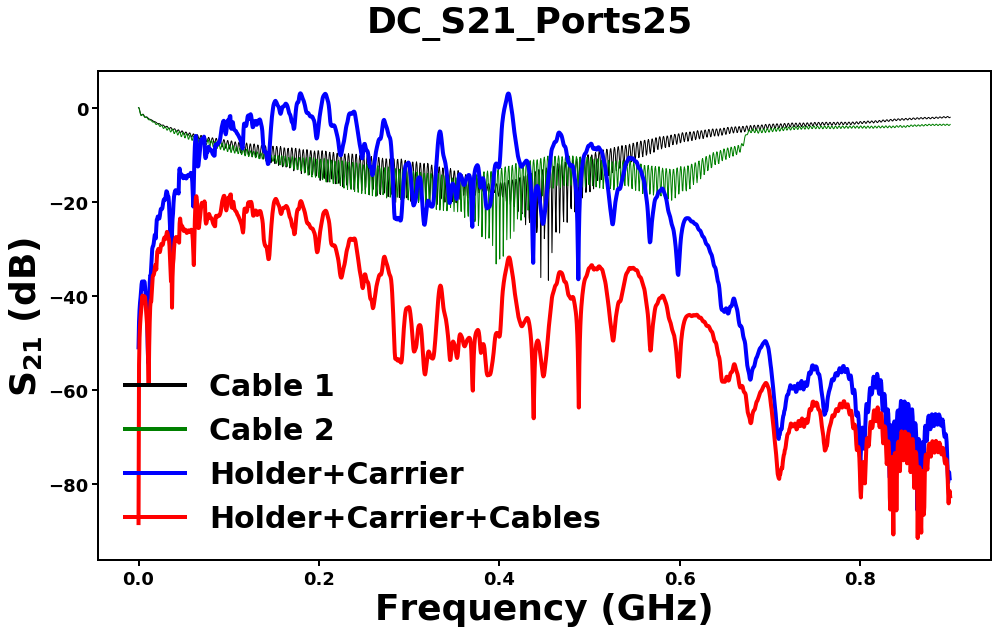

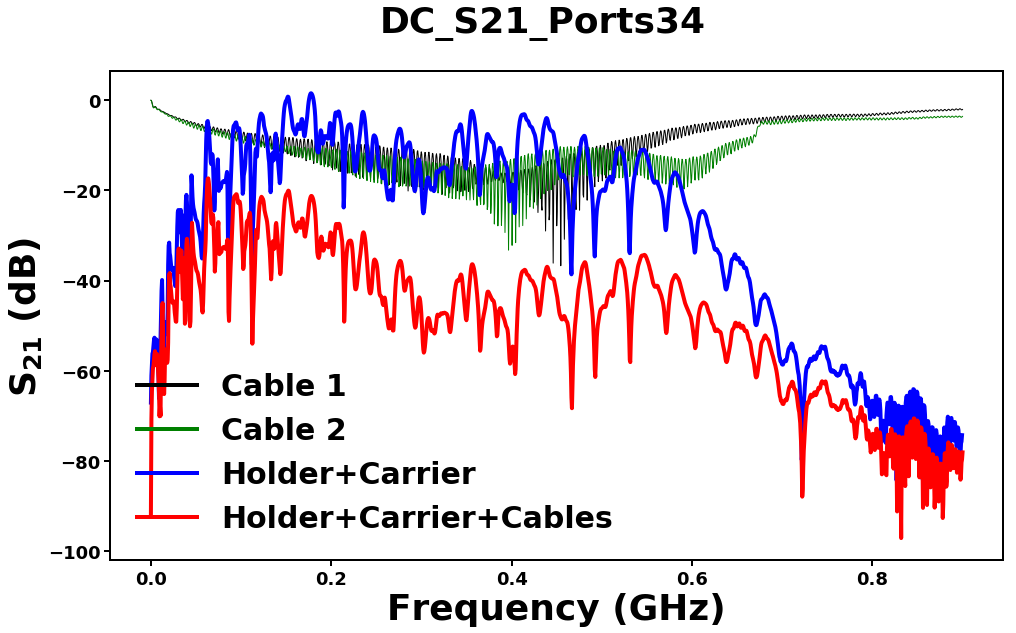

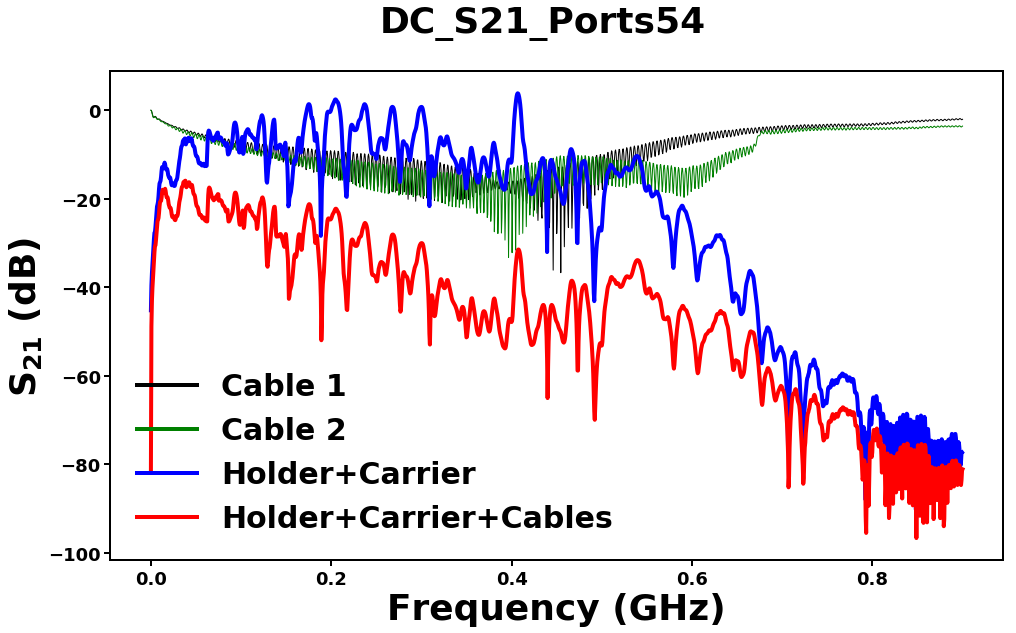

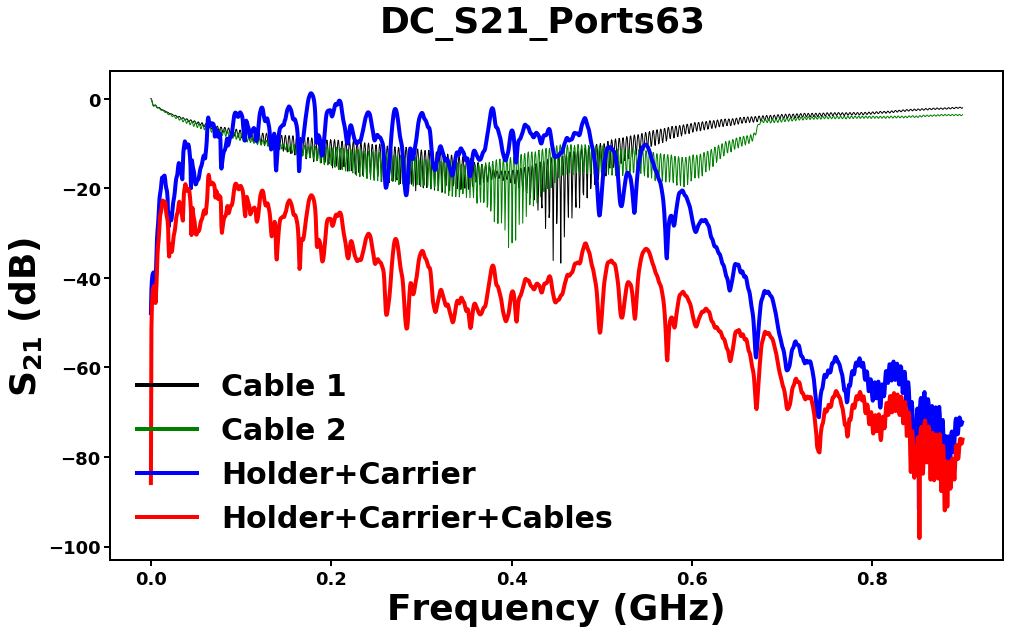

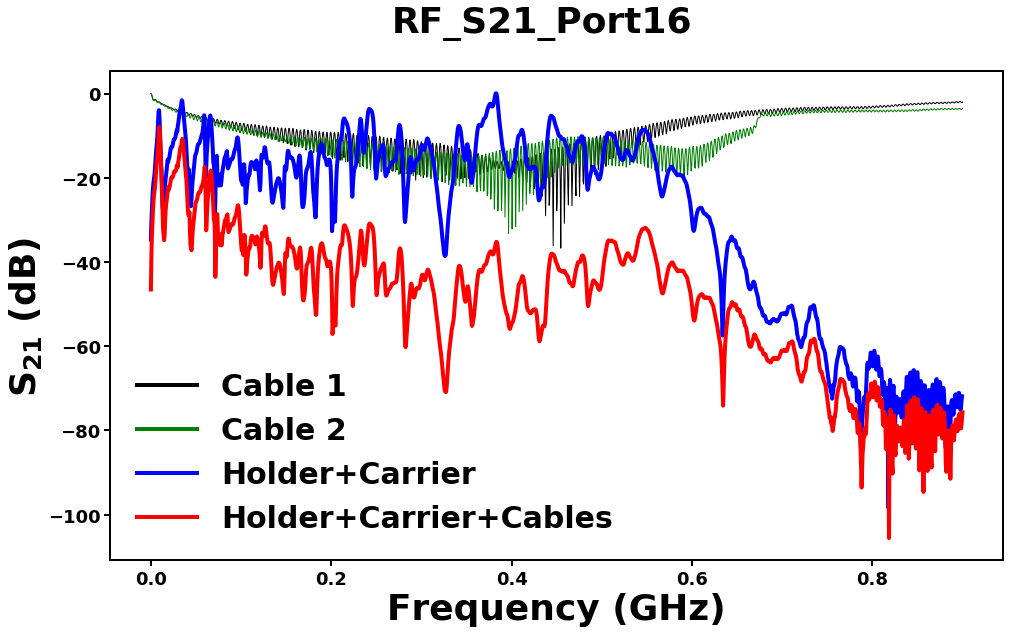

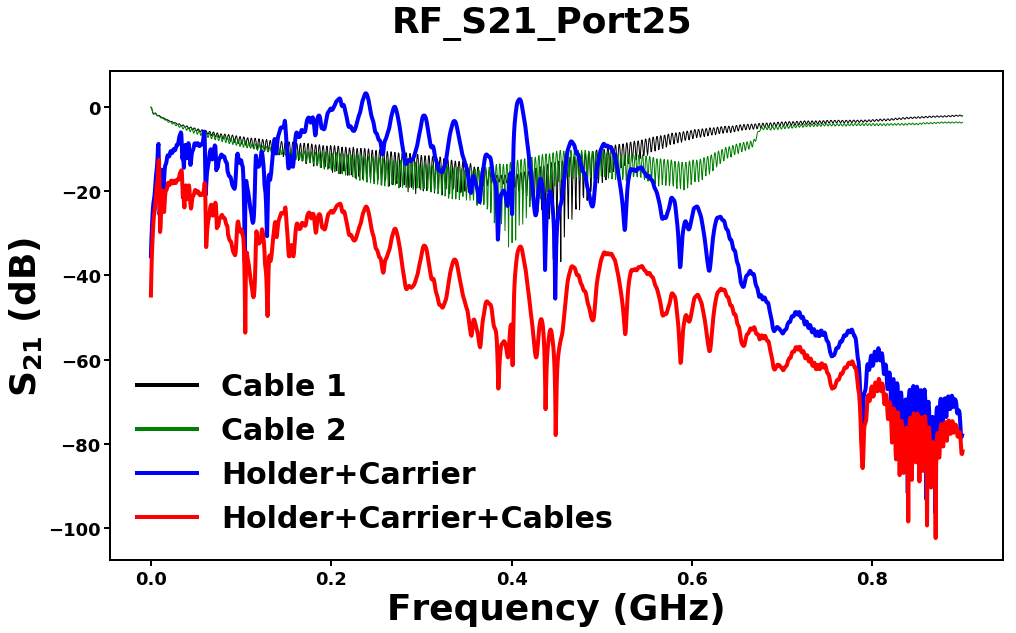

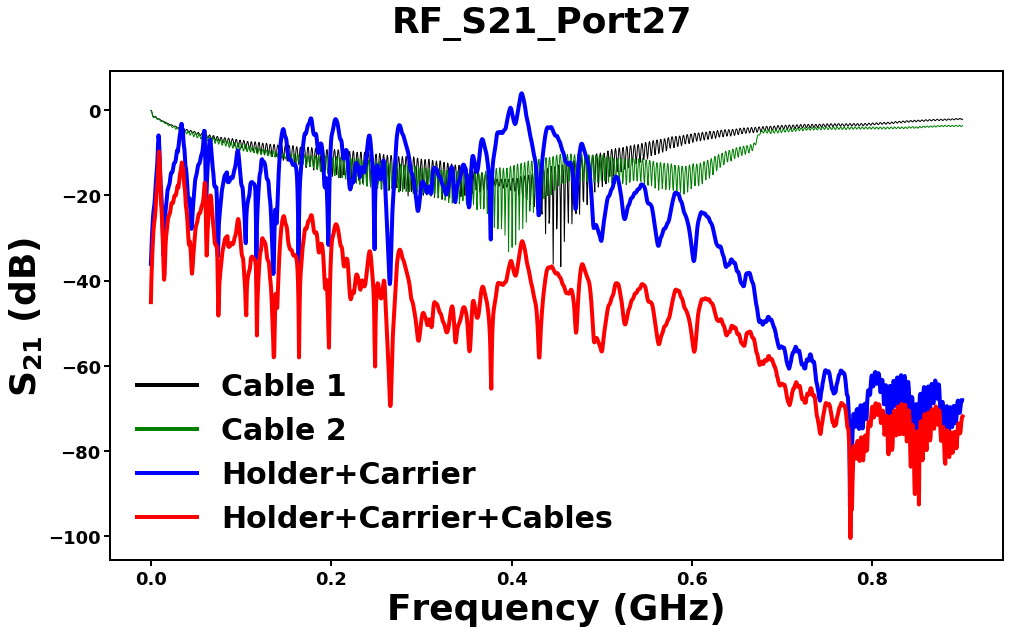

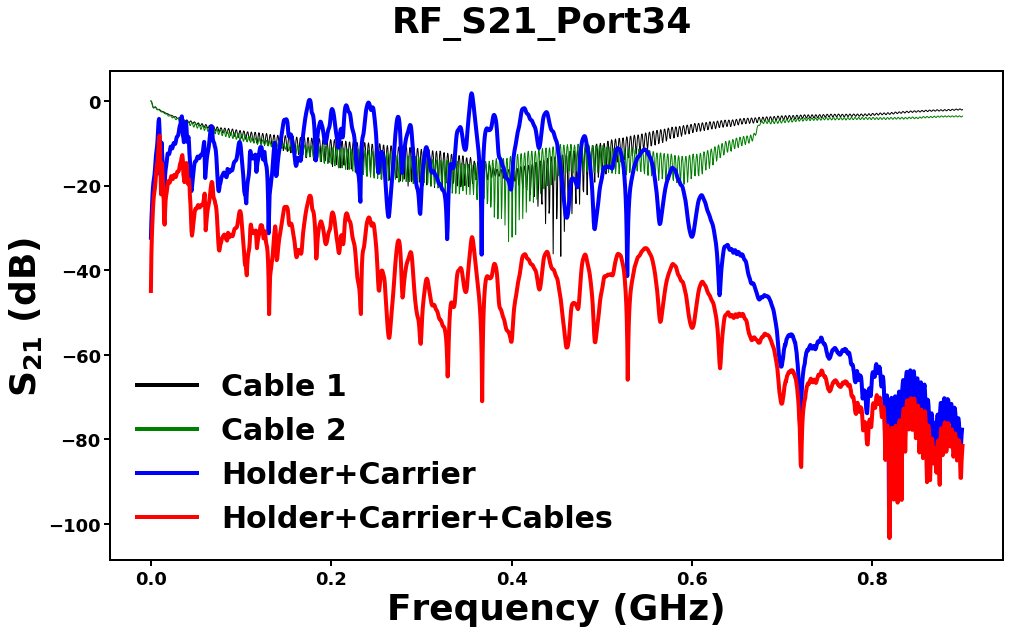

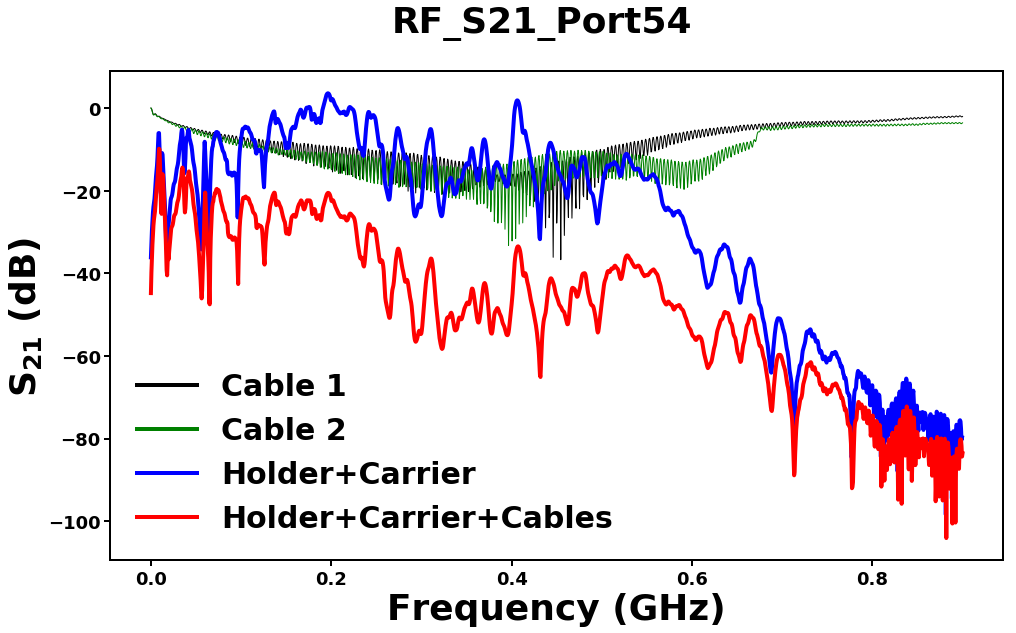

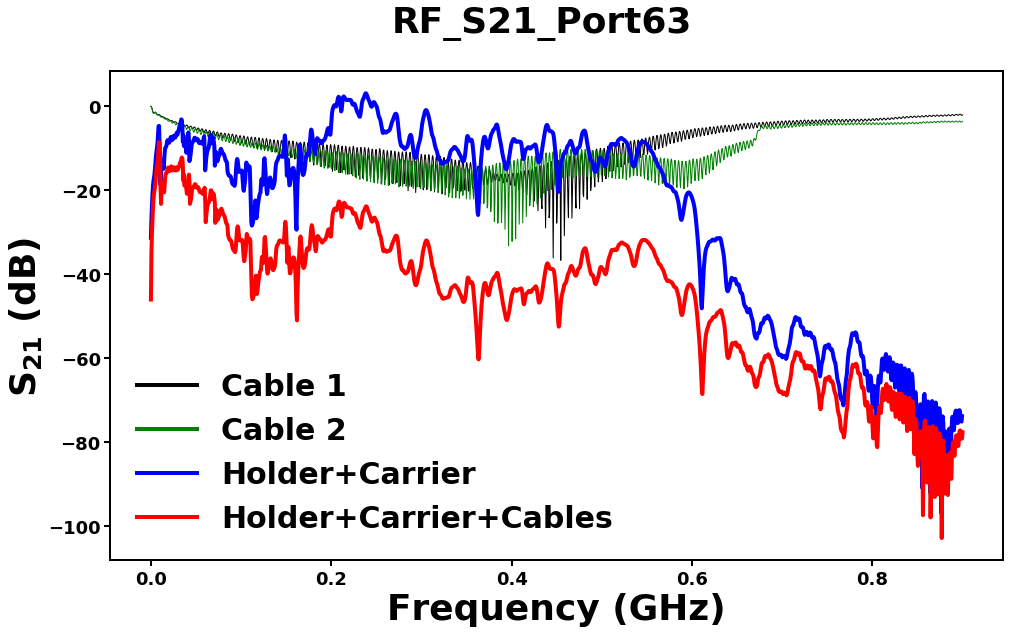

In [16]:
## RF data plotting
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.concatenate((np.arange(0,4),(np.arange(10,16))))
bg_list=np.array([5, 7, 9, 8, 4, 5, 6, 7, 9, 8])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
a=0
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x_cable=data_array[:,0,0]
    y_cable=data_array_cable[:,1,0]
    x_cable1=data_array[:,0,1]
    y_cable1=data_array_cable[:,1,1]
    y_cable_filt=lowpass_filter(y_cable,9,3)
    y_cable1_filt=lowpass_filter(y_cable1,9,3)
    
    x_orig=data_array[:,0,n]
    y_orig=data_array[:,1,n]
    y_carrier=(y_orig-data_array[:,1,bg_list[a]])
    y_bg=data_array[:,1,bg_list[a]]
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    y_orig_filt=lowpass_filter(y_orig,9,3) #Used for plotting B experiments as data_B_R, R=1,2
    
    Y_holder=y_orig[1:]-y_cable_filt-y_cable1_filt
    Y_holder_filt= y_orig_filt-y_cable_filt
    
    Data_Name = os.path.basename(file_list[n]).split('.')[0] #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_cable,'k-',linewidth=1, label='Cable 1')
    fig=plt.plot(x_orig,y_cable1,'g-',linewidth=1, label='Cable 2')
    fig=plt.plot(x_orig[:-1],Y_holder,'b-',linewidth=font_size, label='Holder+Carrier')
    fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Carrier+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    a+=1
    #save_loc=root2.directory+ '/' + 'Python_Results'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

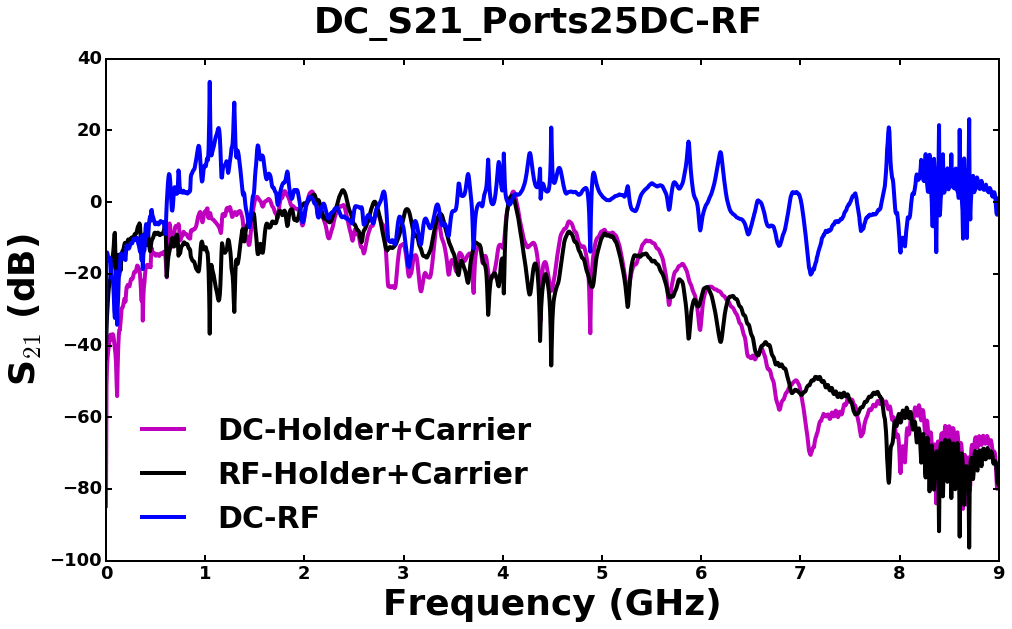

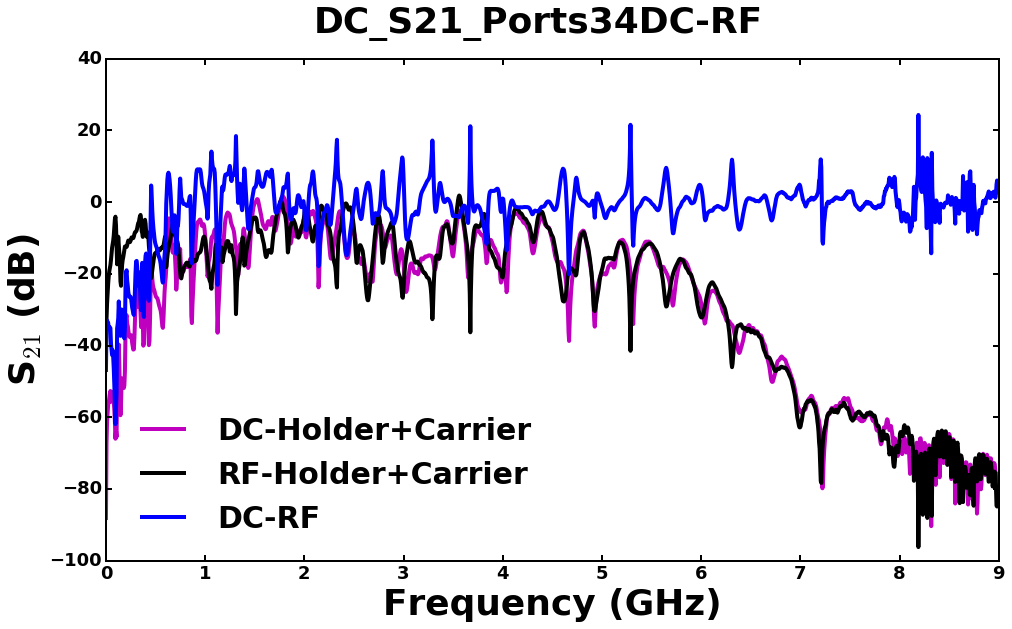

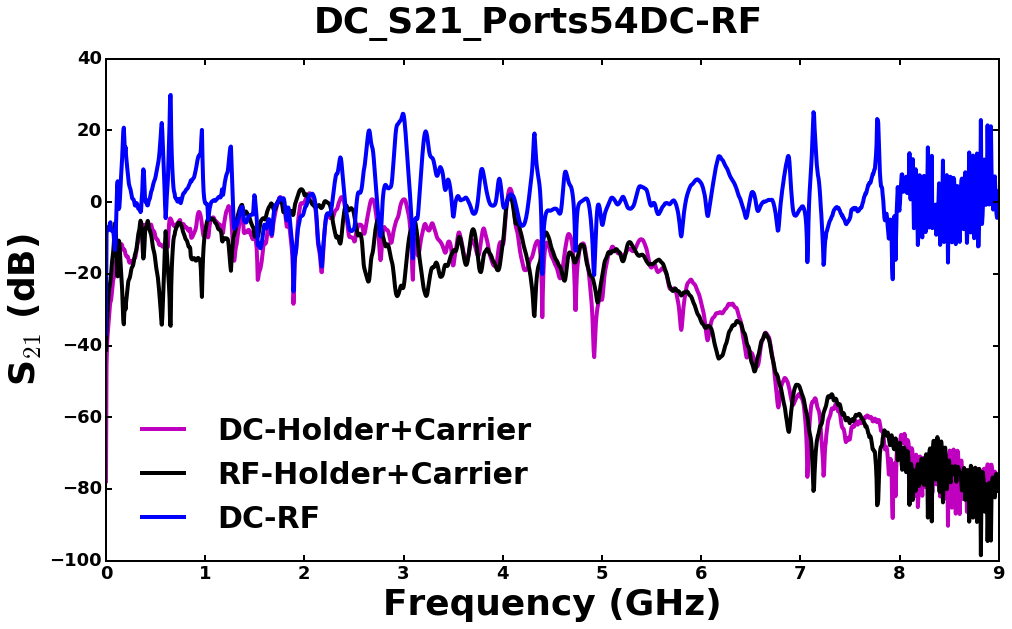

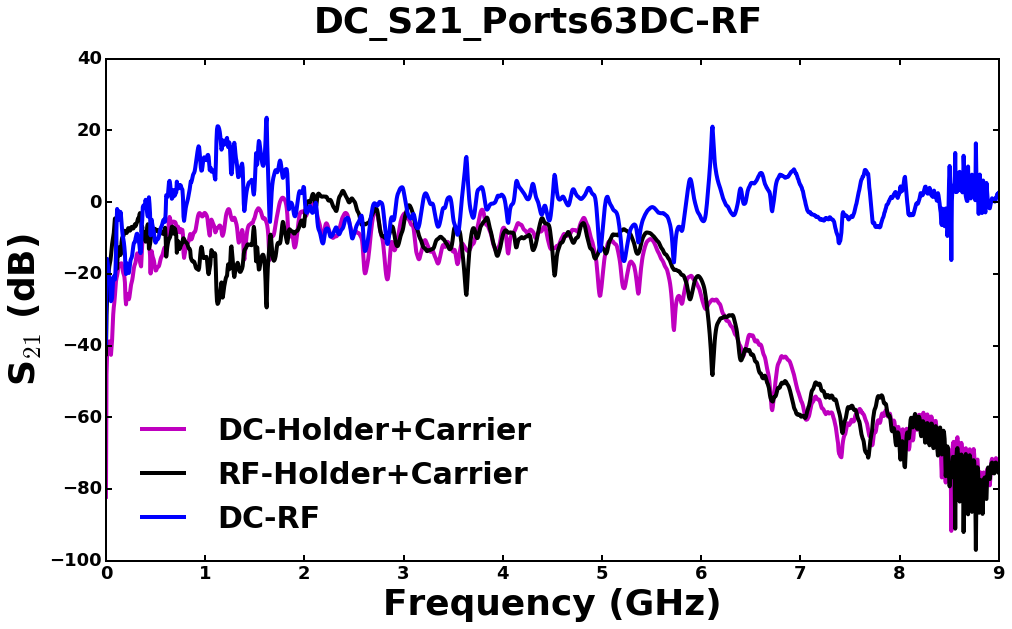

In [37]:
## RF data plotting DC-RF
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.arange(0,4)
bg_list=np.array([11,13,14,15])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments

sum_data=np.zeros((data_array.shape[0]-1,4))
a=0
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x_cable=data_array[:,0,0]
    y_cable=data_array_cable[:,1,0]
    x_cable1=data_array[:,0,1]
    y_cable1=data_array_cable[:,1,1]
    y_cable_filt=lowpass_filter(y_cable,9,3)
    y_cable1_filt=lowpass_filter(y_cable1,9,3)
    
    dcx_orig=data_array[:,0,n]
    dcy_orig=data_array[:-1,1,n]-y_cable_filt-y_cable1_filt
    
    rfy_orig=data_array[:-1,1,bg_list[a]]-y_cable_filt-y_cable1_filt
    y_DCRF=dcy_orig-rfy_orig
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    sum_data[:,a]=y_DCRF
    Data_Name = os.path.basename(file_list[n]).split('.')[0] +'DC-RF' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig[:-1],dcy_orig,'m-',linewidth=font_size, label='DC-Holder+Carrier')
    fig=plt.plot(x_orig[:-1],rfy_orig,'k-',linewidth=font_size, label='RF-Holder+Carrier')
    fig=plt.plot(x_orig[:-1],y_DCRF,'b-',linewidth=font_size, label='DC-RF')
    
    #fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Carrier+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    #plt.show()
    a+=1
    save_loc=root2.directory+ '/' + 'Python_Results'+ '/DC-RF''/' +Data_Name+'.png'
    plt.savefig(save_loc)

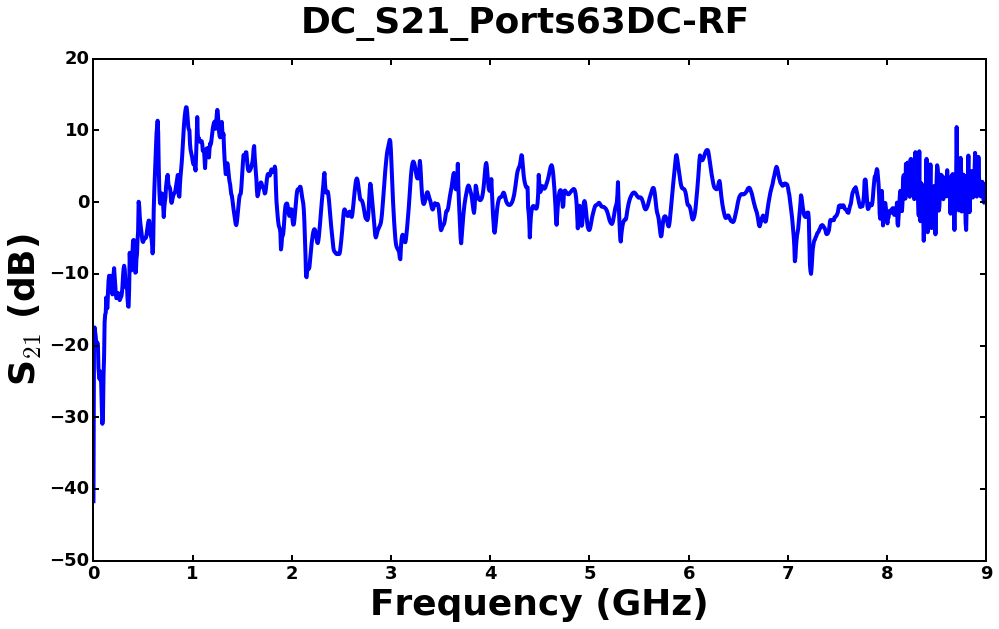

In [31]:
sum_DCRF=np.zeros(sum_data.shape[0])
for n in np.arange(0,4):
    sum_DCRF+=sum_data[:,n]
sum_DCRF=sum_DCRF/4
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)

font_size=4
#fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
fig=plt.plot(x_orig[:-1],sum_DCRF,'b-',linewidth=font_size, label='Carrier')

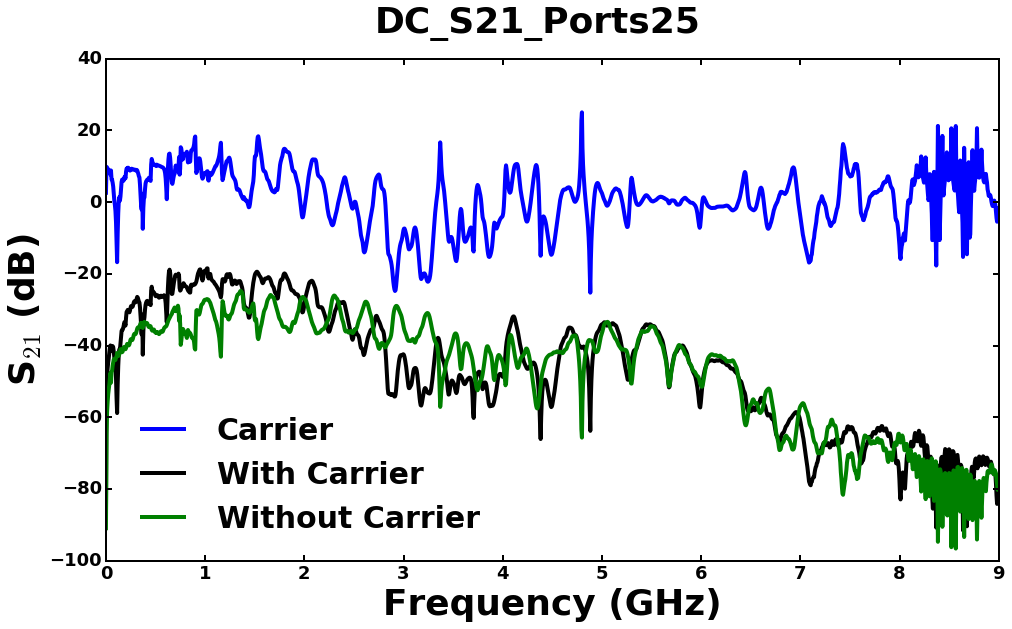

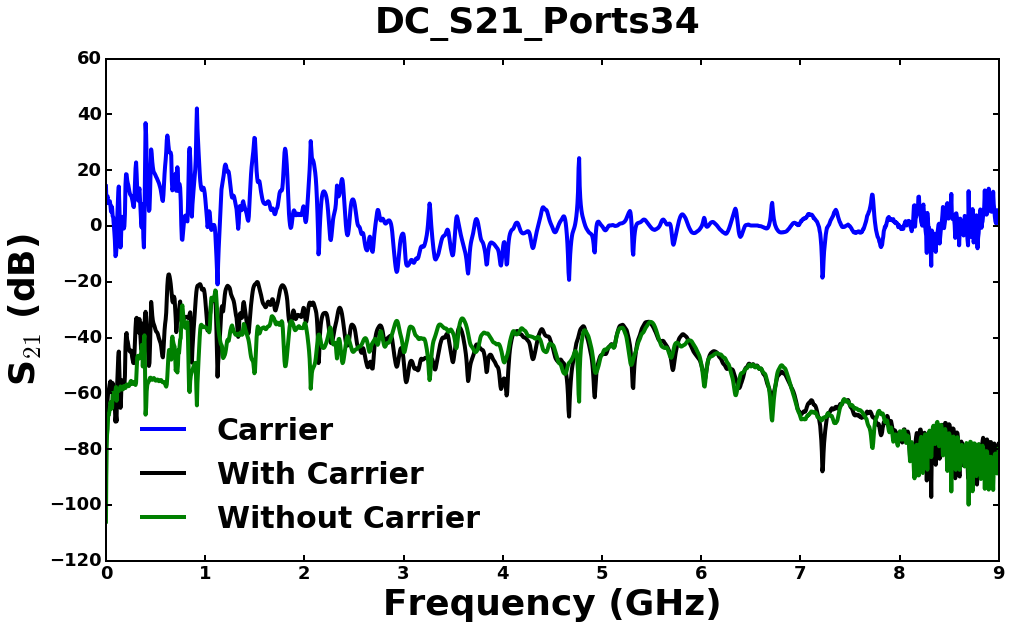

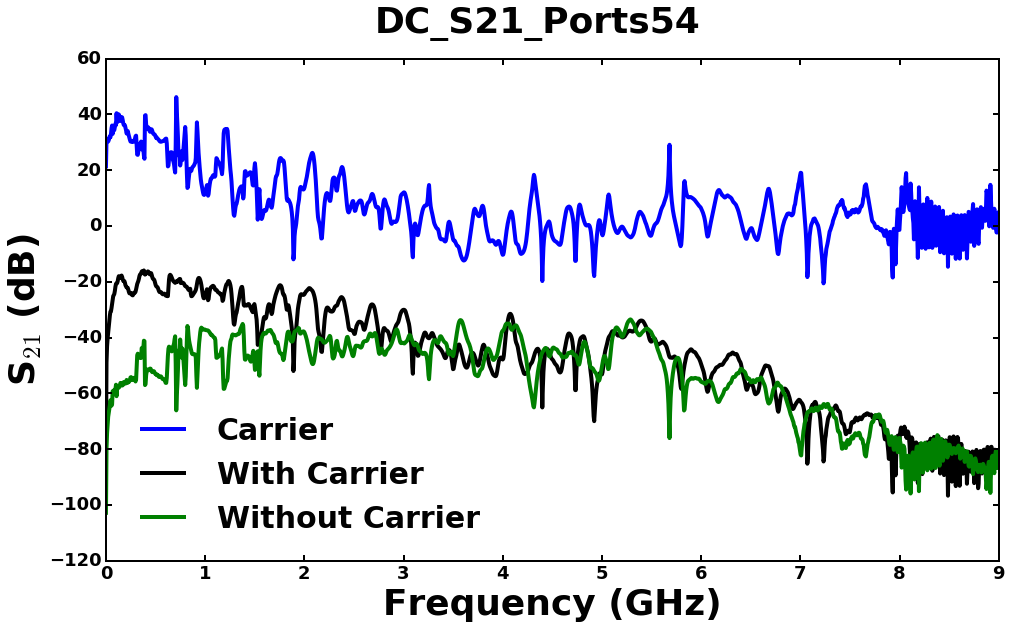

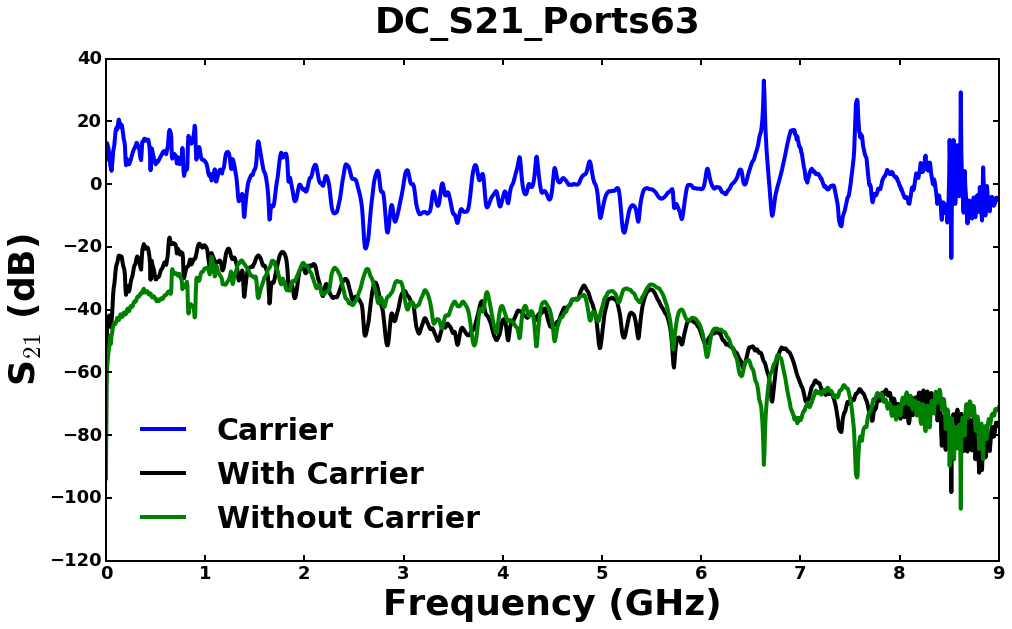

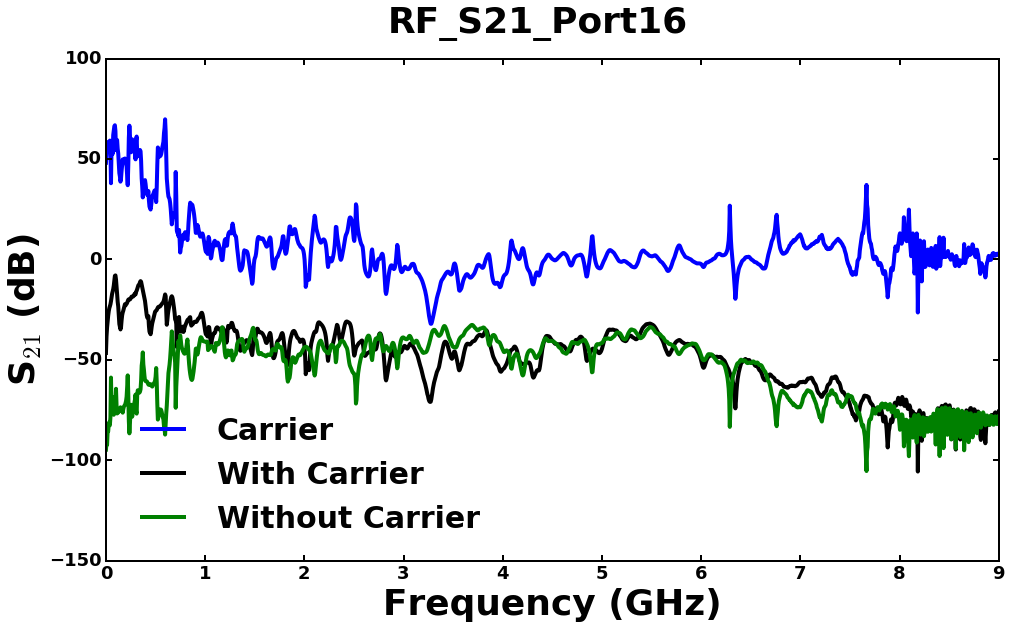

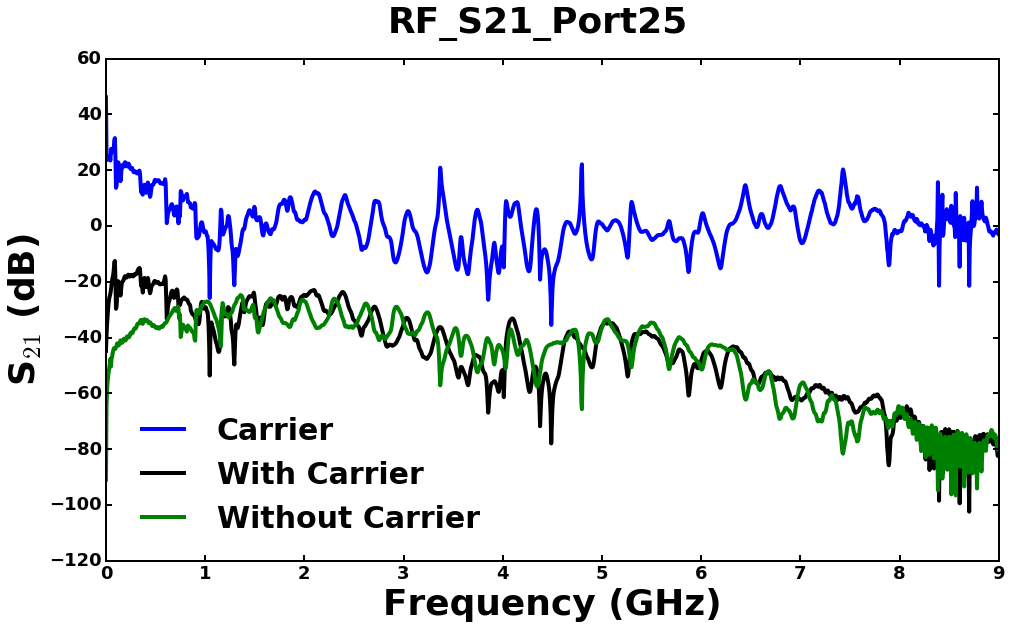

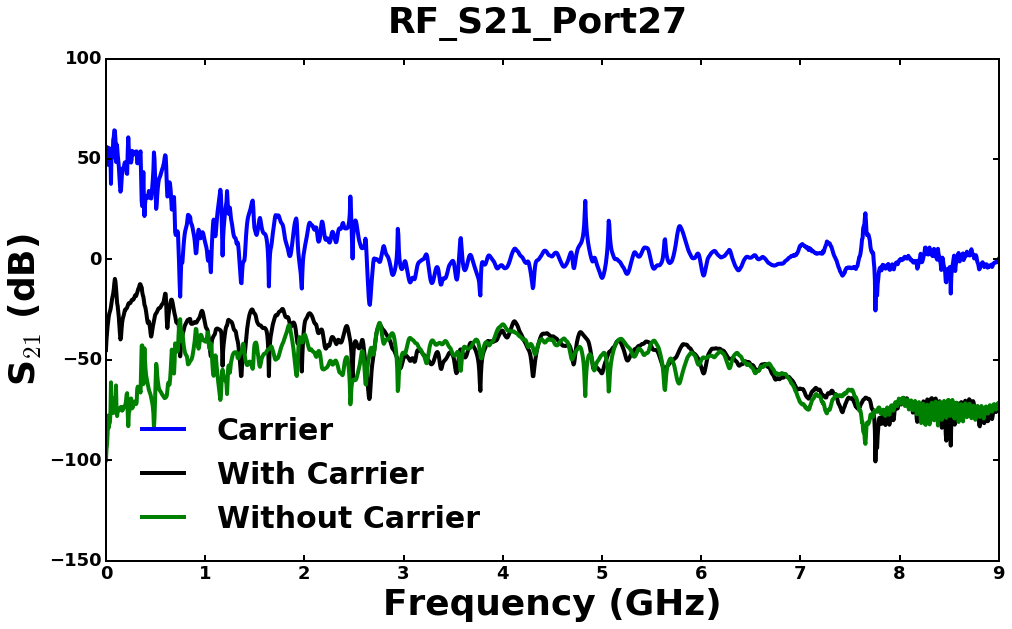

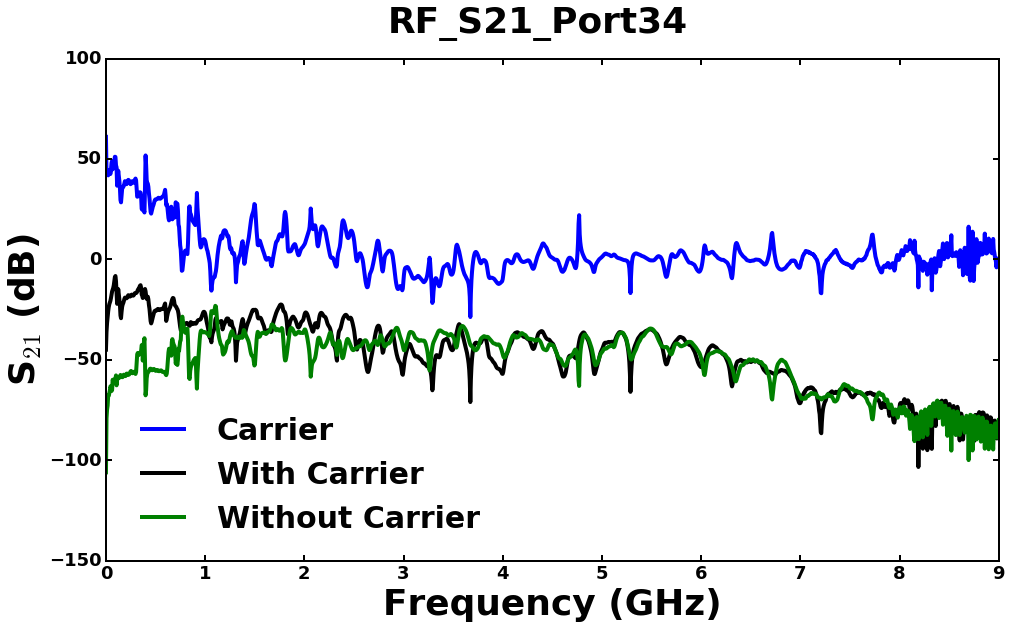

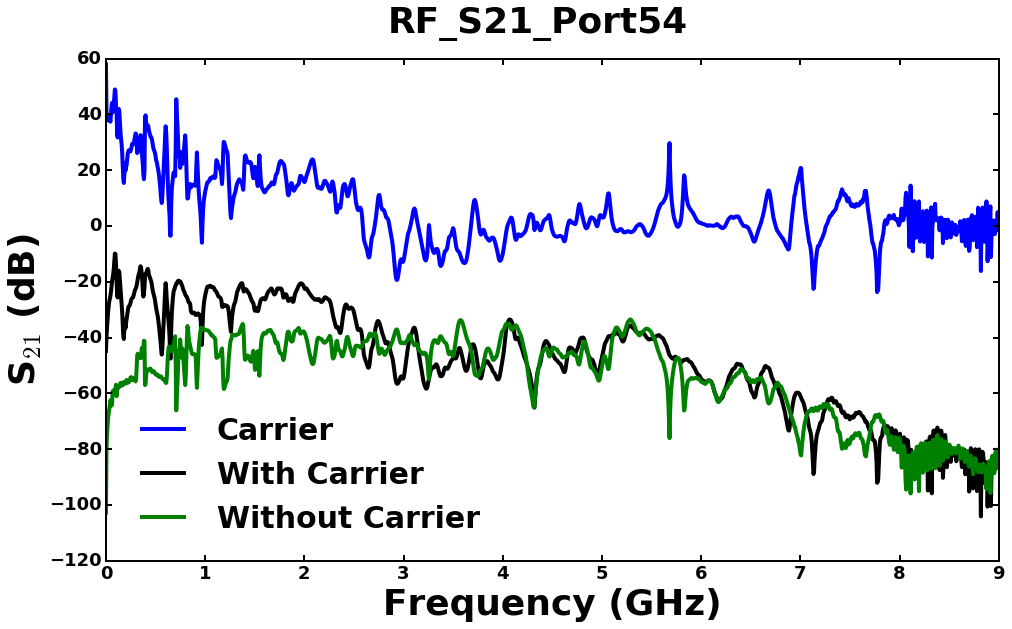

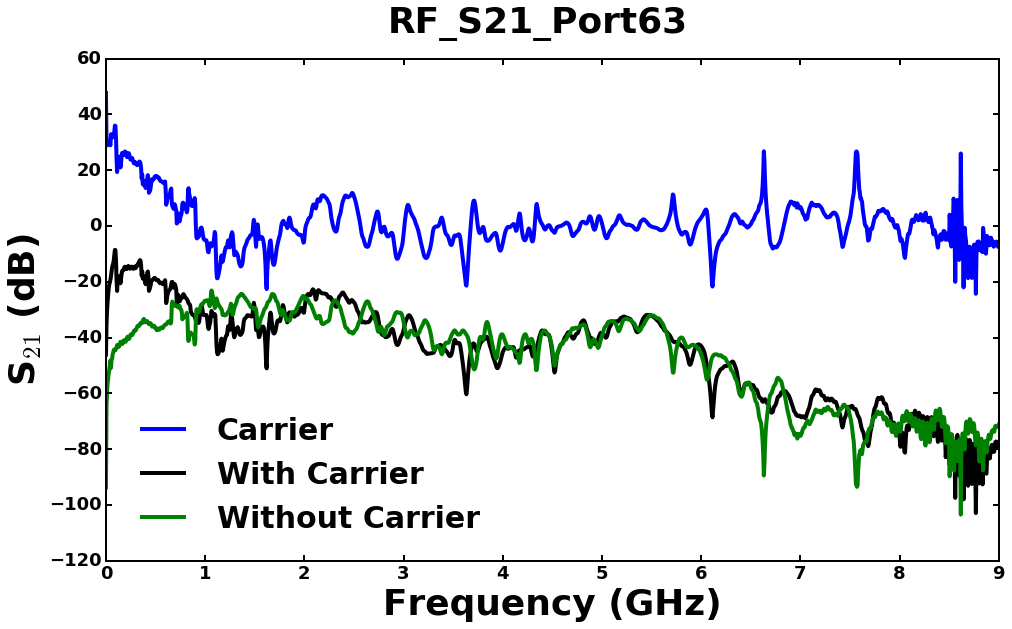

In [17]:
## RF data plotting just carrier
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.concatenate((np.arange(0,4),(np.arange(10,16))))
bg_list=np.array([5, 7, 9, 8, 4, 5, 6, 7, 9, 8])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
a=0
for n in plot_file:
  
    x_orig=data_array[:,0,n]
    y_orig=data_array[:,1,n]
    y_carrier=(y_orig-data_array[:,1,bg_list[a]])
    y_bg=data_array[:,1,bg_list[a]]

    
    Data_Name = os.path.basename(file_list[n]).split('.')[0] #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_carrier,'b-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_orig,'k-',linewidth=font_size, label='With Carrier')
    fig=plt.plot(x_orig,y_bg,'g-',linewidth=font_size, label='Without Carrier')

    #fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Chip+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)
    
    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    a+=1
    #save_loc=root2.directory+ '/' + 'Python_Results'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)